In [1]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex
import qiskit.quantum_info as qi

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#%run utility_functions.ipynb

In [2]:
qc = QuantumCircuit(2,2)

In [3]:
qc.ry(np.pi/2,0)
qc.rxx(np.pi/2,0,1)
qc.rx(-np.pi/2,0)
qc.rx(-np.pi/2,1)
qc.ry(-np.pi/2,0)
qc.barrier()
qc.draw()

┌─────────┐┌───────────┐┌──────────┐┌──────────┐ ░ 
q_0: ┤ Ry(π/2) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├─░─
     └─────────┘│  Rxx(π/2) │├──────────┤└──────────┘ ░ 
q_1: ───────────┤1          ├┤ Rx(-π/2) ├─────────────░─
                └───────────┘└──────────┘             ░ 
c: 2/═══════════════════════════════════════════════════

In [4]:
qc.measure(0,0)
qc.measure(1,1)

In [5]:
qc.draw()

┌─────────┐┌───────────┐┌──────────┐┌──────────┐ ░ ┌─┐   
q_0: ┤ Ry(π/2) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├─░─┤M├───
     └─────────┘│  Rxx(π/2) │├──────────┤└──────────┘ ░ └╥┘┌─┐
q_1: ───────────┤1          ├┤ Rx(-π/2) ├─────────────░──╫─┤M├
                └───────────┘└──────────┘             ░  ║ └╥┘
c: 2/════════════════════════════════════════════════════╩══╩═
                                                         0  1

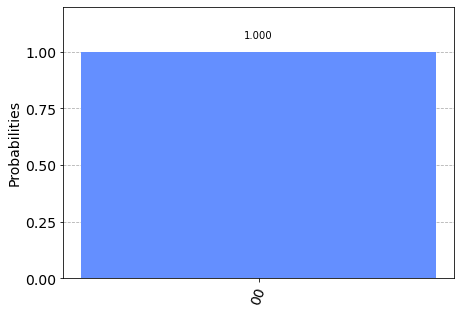

In [6]:
shots = 10000 # number of samples used for statistics
sim = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = sim, shots = shots)
display(plot_histogram(job.result().get_counts()))


In [7]:
qc1 = QuantumCircuit(2,2)
qc1.cnot(0,1)
qc1.barrier()
qc1.measure(0,0)
qc1.measure(1,1)
qc1.draw()

░ ┌─┐   
q_0: ──■───░─┤M├───
     ┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ X ├─░──╫─┤M├
     └───┘ ░  ║ └╥┘
c: 2/═════════╩══╩═
              0  1

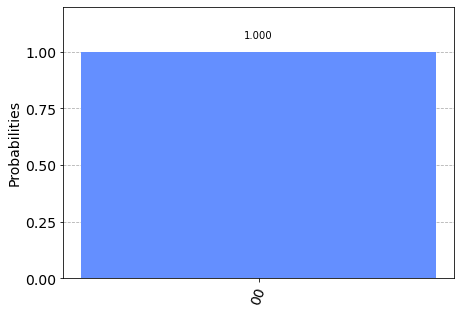

In [8]:
shots = 10000 # number of samples used for statistics
sim = Aer.get_backend('qasm_simulator')
job1 = execute(qc1, backend = sim, shots = shots)
display(plot_histogram(job1.result().get_counts()))

In [9]:
qc2 = QuantumCircuit(2,2)
qc2.x(0)
qc2.ry(np.pi/2,0)
qc2.rxx(np.pi/2,0,1)
qc2.rx(-np.pi/2,0)
qc2.rx(-np.pi/2,1)
qc2.ry(-np.pi/2,0)
qc2.barrier()
qc2.measure(0,0)
qc2.measure(1,1)
qc2.draw()

┌───┐┌─────────┐┌───────────┐┌──────────┐┌──────────┐ ░ ┌─┐   
q_0: ┤ X ├┤ Ry(π/2) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├─░─┤M├───
     └───┘└─────────┘│  Rxx(π/2) │├──────────┤└──────────┘ ░ └╥┘┌─┐
q_1: ────────────────┤1          ├┤ Rx(-π/2) ├─────────────░──╫─┤M├
                     └───────────┘└──────────┘             ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════════════╩══╩═
                                                              0  1

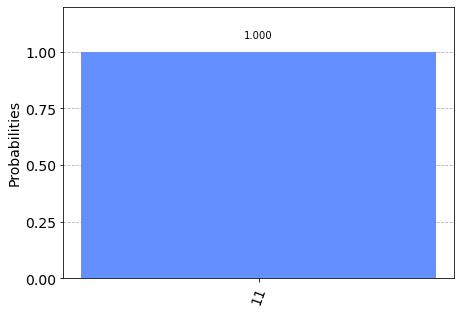

In [10]:
job2 = execute(qc2, backend = sim, shots = shots)
display(plot_histogram(job2.result().get_counts()))

In [11]:
qc3 = QuantumCircuit(2,2)
qc3.x(0)
qc3.cnot(0,1)
qc3.barrier()
qc3.measure(0,0)
qc3.measure(1,1)
qc3.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ X ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

In [14]:
qc4 = QuantumCircuit(2,2)
qc4.ry(np.pi/2,0)
qc4.rxx(np.pi/2,0,1)
qc4.rx(-np.pi/2,0)
qc4.rx(-np.pi/2,1)
qc4.ry(-np.pi/2,0)
qc4.draw()

┌─────────┐┌───────────┐┌──────────┐┌──────────┐
q_0: ┤ Ry(π/2) ├┤0          ├┤ Rx(-π/2) ├┤ Ry(-π/2) ├
     └─────────┘│  Rxx(π/2) │├──────────┤└──────────┘
q_1: ───────────┤1          ├┤ Rx(-π/2) ├────────────
                └───────────┘└──────────┘            
c: 2/════════════════════════════════════════════════

In [15]:
mat = qi.Operator(qc4)

In [18]:
mat = np.array(mat)

In [19]:
mat[:,0]

array([ 7.07106781e-01+7.07106781e-01j,  5.55111512e-17+1.11022302e-16j,
        6.16297582e-33+6.16297582e-33j, -7.85046229e-17-7.85046229e-17j])